In [109]:
# This Notebook is for measuring the popularity of test items
from experiments.data_loader import DataLoader
from shared.enums import Sentiment
import numpy as np
from scipy import stats 
from matplotlib import pyplot as plt 
import seaborn as sns

data_loader = DataLoader('../../data/movielens/split_0')

entity_ratings = dict()

for user, ratings in data_loader.training().items():
    for item, rating in ratings.training.items():
        entity_ratings[item] = entity_ratings.get(item, 0) + 1
        pass

print(entity_ratings)

{10547: 131, 12140: 24, 8455: 58, 9040: 128, 15809: 129, 11880: 18, 7764: 155, 3032: 24, 10540: 7, 2479: 39, 12264: 29, 7782: 74, 9520: 40, 6722: 165, 10545: 33, 6788: 53, 16233: 212, 2946: 25, 11851: 69, 11318: 28, 9034: 117, 11486: 147, 14637: 144, 15145: 29, 12104: 30, 17874: 39, 16113: 96, 5815: 75, 13963: 187, 15241: 38, 14881: 115, 8616: 24, 8437: 60, 16791: 4, 4541: 61, 15803: 47, 7824: 7, 15505: 5, 5920: 15, 14954: 5, 1336: 4, 18198: 18, 7363: 23, 12110: 15, 17728: 24, 16220: 16, 12039: 11, 15945: 25, 13799: 74, 7949: 63, 13085: 95, 5011: 44, 15379: 24, 16265: 72, 12338: 39, 14826: 103, 16361: 142, 4488: 95, 571: 145, 3275: 82, 1610: 76, 11978: 126, 1486: 91, 15963: 101, 11817: 54, 11958: 54, 17523: 74, 11988: 13, 642: 4, 2037: 88, 4697: 18, 17912: 89, 9713: 111, 8288: 32, 14427: 47, 13302: 35, 1175: 95, 6174: 13, 5631: 12, 3568: 37, 7718: 60, 7626: 35, 4122: 43, 7271: 21, 9687: 64, 51: 7, 13894: 50, 10897: 71, 2994: 30, 14898: 3, 17776: 12, 18609: 9, 18260: 43, 4781: 29, 14827

np.mean(differences)=13.922166575367807
DescribeResult(nobs=153, minmax=(2, 212), mean=56.908496732026144, variance=2438.7942036463705, skewness=1.1197721773745033, kurtosis=0.5534471086148738)
np.median(positive_ratings)=42.0
DescribeResult(nobs=15300, minmax=(1, 212), mean=41.21137254901961, variance=1018.8453115351638, skewness=1.1099991030778964, kurtosis=1.2554382775897714)
np.median(unseen_ratings)=33.0
34.400000000000006
3.0


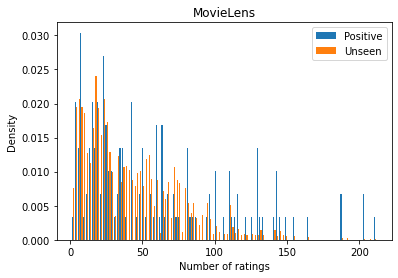

In [110]:
# How popular are positive items compared to unseen samples

positive_ratings = list()
unseen_ratings = list()
differences = list()

for user, ratings in data_loader.testing().items():
    items = set()
    for cold_set in ratings.sets:
        positive_items = cold_set.ranking.sentiment_samples[Sentiment.POSITIVE]
        unseen_items = cold_set.ranking.sentiment_samples[Sentiment.UNSEEN]
        
        for item in positive_items:
            positive_ratings.append(entity_ratings.get(item, 0))
            
        for item in unseen_items:
            unseen_ratings.append(entity_ratings.get(item, 0))
            
        differences.append(np.mean(positive_ratings) - np.mean(unseen_ratings))

print(f'{np.mean(differences)=}')
print(stats.describe(positive_ratings))
print(f'{np.median(positive_ratings)=}')
print(stats.describe(unseen_ratings))
print(f'{np.median(unseen_ratings)=}')

print(f'{np.percentile(positive_ratings, 45)}')
print(f'{np.percentile(unseen_ratings, 3)}')
plt.hist([positive_ratings, unseen_ratings], bins=109, label=['Positive', 'Unseen'], density=True)
plt.legend(loc='upper right')
plt.xlabel('Number of ratings')
plt.ylabel('Density')
plt.title('MovieLens')
plt.savefig('sampling_popularity_bias.pdf', bbox_inches='tight')

In [111]:
# How many unique positive samples we have per test user
test_ratings = dict()
unseen_ratings = dict()
lengths = []

for user, ratings in data_loader.testing().items():
    items = set()
    for cold_set in ratings.sets:
        positive_items = cold_set.ranking.sentiment_samples[Sentiment.POSITIVE]
        
        items.update(positive_items)

    lengths.append(len(items))

print(stats.describe(lengths))

DescribeResult(nobs=153, minmax=(1, 1), mean=1.0, variance=0.0, skewness=0.0, kurtosis=-3.0)
